In [1]:
# Import the SQL database into Pandas.

import pandas as pd
from sqlalchemy import create_engine
import databaseconfig as cfg
import matplotlib.pyplot as plt

# Set connection to *csv's
engine = create_engine(f'postgresql://{cfg.mysql["user"]}:{cfg.mysql["passwd"]}@{cfg.mysql["host"]}:5432/{cfg.mysql["db"]}')
connection = engine.connect()

# Create dataframe
salary_df = pd.read_sql("SELECT * FROM salaries", connection)
titles_df = pd.read_sql("SELECT * FROM titles", connection)

# Combine data
combined_data = pd.merge(titles_df, salary_df, on="emp_no", how="inner")
#print(combined_data)

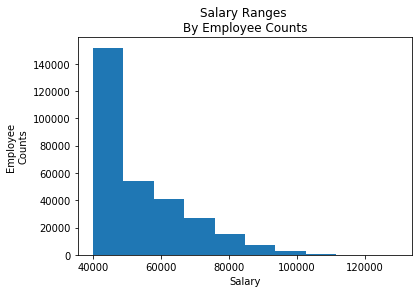

In [2]:
#Create a histogram to visualize the most common salary ranges for employees.

plt.hist(salary_df["salary"])
plt.xlabel('Salary')
plt.ylabel('Employee \nCounts')
plt.title("Salary Ranges \nBy Employee Counts")
plt.show()


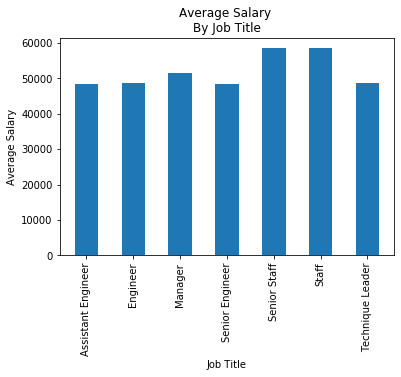

In [3]:
## Create a bar chart of average salary by title.

avg_salary = combined_data.groupby(['title']).mean().reset_index()

#Assign x and y axis
x_axis = avg_salary["title"]
y_axis = avg_salary["salary"]

# Setup graph parameters
plt.xticks(rotation=90)

# Create Graph
bar = plt.bar(x_axis, y_axis, width=.5)
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.title("Average Salary \nBy Job Title")

# Show bar graph
plt.show()

